In [1]:
!pip install torch torchvision efficientnet_pytorch

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.7 MB/s eta 0:00:00
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16426 sha256=5e328eae7b67aaff0ae5308d9aaed8f431e6ef1195f6be11a

In [2]:
#Imports
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from efficientnet_pytorch import EfficientNet
import torch.optim as optim
import shutil
import random
import os
from PIL import Image

# Dataset Preparation

In [4]:
from google.colab import drive

#Connecting google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
base_dataset_dir = "/content/drive/MyDrive/FinalYearProject/ClassificationModels/Dataset" #Original Dataset Location
output_dir = "/content/drive/MyDrive/FinalYearProject/ClassificationModels/SplitDataset"  #Output Dataset Location

In [6]:
#Defining Splits for the dataset train/test/val
splits = ["train", "val", "test"]
split_ratios = {"train": 0.7, "val": 0.15, "test": 0.15}

In [7]:
#Create split directories
for split in splits:
    os.makedirs(os.path.join(output_dir, split), exist_ok=True)

In [ ]:
#Organsisng dataset folders
for record_class in os.listdir(base_dataset_dir):
    class_path = os.path.join(base_dataset_dir, record_class)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    random.shuffle(images)

    #Compute split sizes
    num_train = int(len(images) * split_ratios["train"])
    num_val = int(len(images) * split_ratios["val"])

    train_images = images[:num_train]
    val_images = images[num_train:num_train + num_val]
    test_images = images[num_train + num_val:]

    #Move images to respective folders
    for split, split_images in zip(splits, [train_images, val_images, test_images]):
        split_class_path = os.path.join(output_dir, split, record_class)
        os.makedirs(split_class_path, exist_ok=True)

        for img in split_images:
            src = os.path.join(class_path, img)
            dst = os.path.join(split_class_path, img)
            shutil.copy(src, dst)

In [8]:
#Function for converting images to the same format
def convert_to_jpg_recursive(directory):
    """ Recursively converts all images in the dataset to JPG format and removes originals"""
    for root, _, files in os.walk(directory):
        for filename in files:
            file_path = os.path.join(root, filename)

            #Get file extension
            ext = filename.split(".")[-1].lower()
            if ext in ["jpg", "jpeg"]:
                continue  #Skip already JPG images

            try:
                #Open image
                with Image.open(file_path) as img:
                    img = img.convert("RGB")  #Convert to RGB

                    #Save new file as JPG
                    new_filename = f"{os.path.splitext(filename)[0]}.jpg"
                    new_path = os.path.join(root, new_filename)
                    img.save(new_path, "JPEG", quality=95)

                #Verify successful conversion before deleting old file
                if os.path.exists(new_path):
                    os.remove(file_path)  #Remove original file
                    print(f"Converted & Deleted: {filename} - {new_filename}")
                else:
                    print(f"Failed to convert {filename}")

            except Exception as e:
                print(f"Error converting {filename}: {e}")

In [ ]:
#Converting all images to the same format for consistency
convert_to_jpg_recursive(output_dir)

Converted & Deleted: wicked11.webp - wicked11.jpg
Error converting taste7.avif: cannot identify image file '/content/drive/MyDrive/FinalYearProject/ClassificationModels/SplitDataset/train/TasteCovers/taste7.avif'
Converted & Deleted: taste17.webp - taste17.jpg
Converted & Deleted: taste6.webp - taste6.jpg
Converted & Deleted: taste2.webp - taste2.jpg
Converted & Deleted: taste8.webp - taste8.jpg
Converted & Deleted: midnights12.webp - midnights12.jpg
Converted & Deleted: midnights8.webp - midnights8.jpg
Converted & Deleted: midnights3.webp - midnights3.jpg
Converted & Deleted: whitney18.webp - whitney18.jpg
Error converting whitney1.avif: cannot identify image file '/content/drive/MyDrive/FinalYearProject/ClassificationModels/SplitDataset/train/WhitneyCovers/whitney1.avif'
Converted & Deleted: whitney3.png - whitney3.jpg
Converted & Deleted: whitney8.webp - whitney8.jpg
Converted & Deleted: whitney12.webp - whitney12.jpg
Converted & Deleted: rumours15.webp - rumours15.jpg
Converted & D

# Augmentations and Data Loading

In [9]:
import cv2
import numpy as np
from albumentations import (
    HorizontalFlip, VerticalFlip, RandomRotate90, ShiftScaleRotate,
    RandomBrightnessContrast, RGBShift, Resize, Compose
)
from albumentations.pytorch import ToTensorV2

In [10]:
#Define augmentations using Albumentations
augmentation_pipeline = Compose([
    Resize(224, 224, p=1.0),
    HorizontalFlip(p=0.5),
    VerticalFlip(p=0.2),
    RandomRotate90(p=0.5),
    ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15, p=0.7),
    RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    RGBShift(r_shift_limit=10, g_shift_limit=10, b_shift_limit=10, p=0.5),
])

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [11]:
def augment_images(original_dataset_path, augmented_dataset_path, num_augments=10):
    """
    Augments images in the train set and copies val/test sets as they are.

    :param original_dataset_path: Path to the original dataset (SplitDataset).
    :param augmented_dataset_path: Path to save the augmented dataset.
    :param num_augments: Number of augmented images per original (default: 10).
    """
    # Create necessary directories
    for split in ["train", "val", "test"]:
        split_path = os.path.join(augmented_dataset_path, split)
        os.makedirs(split_path, exist_ok=True)

        for class_folder in os.listdir(os.path.join(original_dataset_path, split)):
            class_input_path = os.path.join(original_dataset_path, split, class_folder)
            class_output_path = os.path.join(split_path, class_folder)
            os.makedirs(class_output_path, exist_ok=True)

            for img_name in os.listdir(class_input_path):
                img_path = os.path.join(class_input_path, img_name)
                image = cv2.imread(img_path)

                if image is None:
                    print(f"Warning: Could not read {img_path}. Skipping...")
                    continue

                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                #Train Set Apply Augmentations
                if split == "train":
                    for i in range(num_augments):
                        augmented = augmentation_pipeline(image=image)["image"]
                        aug_img_name = f"{os.path.splitext(img_name)[0]}_aug_{i}.jpg"
                        aug_img_path = os.path.join(class_output_path, aug_img_name)
                        cv2.imwrite(aug_img_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))

                #Val/Test Sets no augmentation
                else:
                    shutil.copy(img_path, os.path.join(class_output_path, img_name))

In [12]:
#output path for the augmented images
augmented_output_path = "/content/drive/MyDrive/FinalYearProject/ClassificationModels/AugmentedDataset"

In [ ]:
#Augmenting images
augment_images(output_dir, augmented_output_path, num_augments=10)

# Preparing For Training Model

In [13]:
import os

#Function for counting the amount of images for testign purposes
def count_images(dataset_path):
    """
    Counts and prints the number of images in each class folder for train, val, and test sets.

    :param dataset_path: Path to the dataset (AugmentedDataset).
    """
    for split in ["train", "val", "test"]:
        split_path = os.path.join(dataset_path, split)
        print(f"\nChecking '{split}' dataset...")

        if not os.path.exists(split_path):
            print(f"Error: {split_path} does not exist!")
            continue

        total_images = 0

        for class_folder in sorted(os.listdir(split_path)):
            class_path = os.path.join(split_path, class_folder)
            if not os.path.isdir(class_path):
                continue

            num_images = len([f for f in os.listdir(class_path) if f.endswith((".jpg", ".jpeg", ".png"))])
            total_images += num_images

            print(f"{class_folder}: {num_images} images")

        print(f"Total in '{split}': {total_images} images")


dataset_path = "/content/drive/MyDrive/FinalYearProject/ClassificationModels/AugmentedDataset/"
count_images(dataset_path)


Checking 'train' dataset...
MidnightsCovers: 140 images
RumoursCovers: 140 images
TasteCovers: 140 images
WhitneyCovers: 140 images
WickedCovers: 140 images
Total in 'train': 700 images

Checking 'val' dataset...
MidnightsCovers: 3 images
RumoursCovers: 3 images
TasteCovers: 3 images
WhitneyCovers: 3 images
WickedCovers: 3 images
Total in 'val': 15 images

Checking 'test' dataset...
MidnightsCovers: 3 images
RumoursCovers: 3 images
TasteCovers: 3 images
WhitneyCovers: 3 images
WickedCovers: 3 images
Total in 'test': 15 images


In [14]:
#Define transformations for the train, val, and test sets
# Data augmentation for the training dataset
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),      #Randomly crop and resize image
    transforms.RandomHorizontalFlip(),      #Random horizontal flip
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

#For validation and test, no augmentation, just normalization
transform_test_val = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [15]:
#Load the datasets from the folders
train_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/FinalYearProject/ClassificationModels/AugmentedDataset/train', transform=transform_train)
val_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/FinalYearProject/ClassificationModels/AugmentedDataset/augmented_val', transform=transform_test_val)
test_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/FinalYearProject/ClassificationModels/AugmentedDataset/augmented_test', transform=transform_test_val)

In [16]:
from torch.utils.data import DataLoader

#Creating DataLoader instances for each dataset
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Check the number of samples in each dataset
print(f"Train dataset size: {len(train_loader.dataset)}")
print(f"Validation dataset size: {len(val_loader.dataset)}")
print(f"Test dataset size: {len(test_loader.dataset)}")

Train dataset size: 700
Validation dataset size: 150
Test dataset size: 150


In [17]:
# Early stopping class
class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.delta = delta
        self.best_loss = None
        self.counter = 0

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1

        if self.counter >= self.patience:
            print("Early stopping triggered")
            return True
        return False

# Early stopping in training loop
early_stopping = EarlyStopping(patience=3, delta=0.001)

# Model

In [18]:
from torchvision import models

#Load the pre-trained EfficientNet model
model = models.efficientnet_b0(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 152MB/s]


In [ ]:
#Freeze feature extractor layers
for param in model.features.parameters():
    param.requires_grad = False

In [ ]:
#Modifying the final fully connected layer to match the number of classes
num_ftrs = model.classifier[1].in_features   #Number of input features to the final layer

model.classifier = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_ftrs, 5) #Matches numeber of classes - 5
)

In [ ]:
#Send the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)
criterion = nn.CrossEntropyLoss()

In [ ]:
import sys

#Define the training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    best_val_acc = 0.0
    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs} Started")
        model.train()  #Set model to training mode
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)

            #Zero the parameter gradients
            optimizer.zero_grad()

            #Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            #Backward pass
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            #Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            #Show progress every few batches
            if (batch_idx + 1) % 10 == 0 or batch_idx == len(train_loader) - 1:
                print(f"  Batch [{batch_idx+1}/{len(train_loader)}] - Loss: {loss.item():.4f}")
                sys.stdout.flush()

        #Epoch summary
        train_acc = correct / total
        print(f"\nEpoch {epoch+1} Complete - Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_acc*100:.2f}%")

        #Validate the model
        val_acc = evaluate_model(model, val_loader)
        print(f"Validation Accuracy: {val_acc*100:.2f}%")

        # if early_stopping(val_acc):
        #   print(f"Stopping early at epoch {epoch+1}")
        #   break

        #Save the best model based on validation accuracy
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "best_model.pth")
            print("Best model saved!")

    print("\nTraining complete")

In [ ]:
from sklearn.metrics import classification_report

def evaluate_model(model, val_loader):
    model.eval()  #Set model to evaluation mode
    y_true, y_pred = [], []  #Lists to store true and predicted labels

    with torch.no_grad():  #Disable gradient computation for validation
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            #Forward pass
            outputs = model(images)

            #Get predicted class by selecting the class with the highest probability
            _, predicted = torch.max(outputs, 1)

            #Convert to numpy arrays and extend the lists
            y_true.extend(labels.cpu().numpy())  #onvert true labels to numpy
            y_pred.extend(predicted.cpu().numpy())  #Convert predicted labels to numpy

    #Call classification_report only if y_true and y_pred are valid
    if y_true and y_pred:
        print(classification_report(y_true, y_pred))
    else:
        print("Error: y_true or y_pred is empty.")

    accuracy = sum([1 for true, pred in zip(y_true, y_pred) if true == pred]) / len(y_true)
    return accuracy

In [ ]:
#Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=15)


Epoch 1/15 Started
  Batch [10/44] - Loss: 1.6367
  Batch [20/44] - Loss: 1.6582
  Batch [30/44] - Loss: 1.5119
  Batch [40/44] - Loss: 1.4928
  Batch [44/44] - Loss: 1.5263

Epoch 1 Complete - Loss: 1.5877, Train Accuracy: 24.29%
              precision    recall  f1-score   support

           0       0.38      0.60      0.46        30
           1       0.48      0.37      0.42        30
           2       0.29      0.20      0.24        30
           3       0.44      0.40      0.42        30
           4       0.32      0.33      0.33        30

    accuracy                           0.38       150
   macro avg       0.38      0.38      0.37       150
weighted avg       0.38      0.38      0.37       150

Validation Accuracy: 38.00%
Best model saved!

Epoch 2/15 Started
  Batch [10/44] - Loss: 1.4760
  Batch [20/44] - Loss: 1.4621
  Batch [30/44] - Loss: 1.4235
  Batch [40/44] - Loss: 1.4207
  Batch [44/44] - Loss: 1.4858

Epoch 2 Complete - Loss: 1.4697, Train Accuracy: 41.86%
 

In [ ]:
#Evalutaitng the trained models metrics for each class
model.load_state_dict(torch.load("best_model.pth"))
test_acc = evaluate_model(model, test_loader)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.90      0.60      0.72        30
           1       0.52      0.93      0.67        30
           2       0.75      0.50      0.60        30
           3       0.96      0.77      0.85        30
           4       0.78      0.83      0.81        30

    accuracy                           0.73       150
   macro avg       0.78      0.73      0.73       150
weighted avg       0.78      0.73      0.73       150

Test Accuracy: 72.67%


Precision: 0.7816
Recall: 0.7267
F1 Score: 0.7290


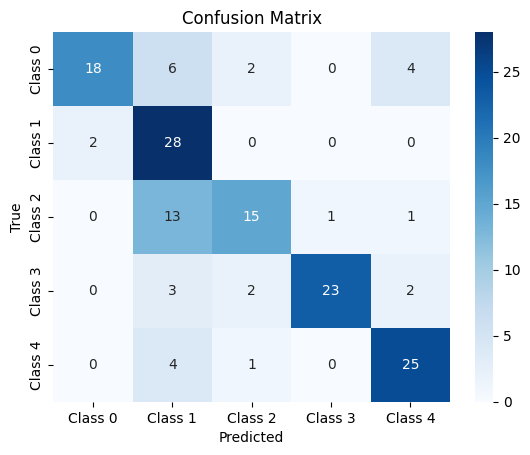

In [ ]:
#Evaluate the model with Precision, Recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Function for evalutating the model metrics and confusion matrix
def compute_metrics(model, test_loader, device="cuda"):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    #Getting the precision, recall and f1 scores of the model
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    #Printing scores
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    #Confusion matrix with heatmap
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Call the function on the test set
compute_metrics(model, test_loader, device)


In [ ]:
#Save the final trained model
torch.save(model.state_dict(), "final_model.pth")

In [ ]:
import os
from torchvision import transforms
from PIL import Image

#Define the augmentation transforms
augmentation_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.RandomPerspective(distortion_scale=0.2, p=1.0, interpolation=3),
    transforms.RandomVerticalFlip(),
    transforms.RandomGrayscale(p=0.2),
    transforms.GaussianBlur(3),
    transforms.RandomRotation(45)
])

#Define function to save augmented images
def save_augmented_images(src_dir, dst_dir, num_augmentations=9):
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)

    #Iterate over the classes
    for class_name in os.listdir(src_dir):
        class_path = os.path.join(src_dir, class_name)

        #Check if the folder is a class folder
        if os.path.isdir(class_path):
            class_save_path = os.path.join(dst_dir, class_name)
            if not os.path.exists(class_save_path):
                os.makedirs(class_save_path)

            #Print class name for debugging
            print(f"Processing class: {class_name}")

            #Count the number of images in the class folder
            image_count = 0
            for img_name in os.listdir(class_path):
                #Check for image file extensions
                if img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.JPG', '.JPEG')):
                    image_count += 1

            #Print the number of images found in the class folder
            print(f"  Found {image_count} image(s) in class {class_name}")

            #Iterate over each image in the class folder
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)

                #Only process image files
                if img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.JPG', '.JPEG')):
                    try:
                        img = Image.open(img_path).convert("RGB")
                        #Save the original image
                        original_img_path = os.path.join(class_save_path, img_name)
                        img.save(original_img_path)

                        for i in range(num_augmentations):
                            #Apply augmentations
                            augmented_img = augmentation_transforms(img)

                            #Save the augmented image with a unique name
                            augmented_img.save(os.path.join(class_save_path, f"{img_name.split('.')[0]}_aug_{i}.jpg"))

                        #Debugging output to check that images are being processed
                        print(f"  Processed {img_name}, saved 1 original and {num_augmentations} augmented images.")
                    except Exception as e:
                        print(f"Error processing image {img_name}: {e}")

#Define paths to your original dataset on Google Drive
base_path = '/content/drive/MyDrive/FinalYearProject/ClassificationModels/AugmentedDataset'

#Define the paths for the validation and test datasets
val_path = os.path.join(base_path, 'val')
test_path = os.path.join(base_path, 'test')

#Define the paths to save augmented datasets
augmented_val_path = os.path.join(base_path, 'augmented_val')
augmented_test_path = os.path.join(base_path, 'augmented_test')

#Apply augmentations
save_augmented_images(val_path, augmented_val_path, num_augmentations=9)
save_augmented_images(test_path, augmented_test_path, num_augmentations=9)

print(f"Augmented validation images saved to: {augmented_val_path}")
print(f"Augmented test images saved to: {augmented_test_path}")


Processing class: WickedCovers
  Found 3 image(s) in class WickedCovers
  Processed wicked1.jpg, saved 1 original and 9 augmented images.
  Processed wicked14.jpeg, saved 1 original and 9 augmented images.
  Processed wicked10.jpg, saved 1 original and 9 augmented images.
Processing class: TasteCovers
  Found 3 image(s) in class TasteCovers
  Processed taste10.jpeg, saved 1 original and 9 augmented images.
  Processed taste9.jpeg, saved 1 original and 9 augmented images.
  Processed taste14.jpg, saved 1 original and 9 augmented images.
Processing class: MidnightsCovers
  Found 3 image(s) in class MidnightsCovers
  Processed midnights20.jpg, saved 1 original and 9 augmented images.
  Processed midnights18.jpeg, saved 1 original and 9 augmented images.
  Processed midnights7.jpg, saved 1 original and 9 augmented images.
Processing class: WhitneyCovers
  Found 3 image(s) in class WhitneyCovers
  Processed whitney6.jpg, saved 1 original and 9 augmented images.
  Processed whitney7.jpeg, sa

# Vinyl Record Classifier Model

In [19]:
import os
import shutil
import random

In [20]:
from google.colab import drive
drive.mount('/content/drive')

#Define dataset paths
dataset_path = "/content/drive/MyDrive/FinalYearProject/ClassificationModels/RecordDataset"
output_path = "/content/drive/MyDrive/FinalYearProject/ClassificationModels/RecordSplitDataset"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
#Create train, val, test directories
for split in ["train", "val", "test"]:
    for class_name in os.listdir(dataset_path):
        os.makedirs(os.path.join(output_path, split, class_name), exist_ok=True)

In [ ]:
#Set split ratios
split_ratio = {"train": 0.7, "val": 0.15, "test": 0.15}

#Organising the record dataset intro train, test, val splits and into their classes
for class_name in os.listdir(dataset_path):
    images = os.listdir(os.path.join(dataset_path, class_name))
    random.shuffle(images)

    train_split = int(split_ratio["train"] * len(images))
    val_split = int(split_ratio["val"] * len(images))

    train_files = images[:train_split]
    val_files = images[train_split : train_split + val_split]
    test_files = images[train_split + val_split:]

    for file in train_files:
        shutil.copy(os.path.join(dataset_path, class_name, file),
                    os.path.join(output_path, "train", class_name, file))

    for file in val_files:
        shutil.copy(os.path.join(dataset_path, class_name, file),
                    os.path.join(output_path, "val", class_name, file))

    for file in test_files:
        shutil.copy(os.path.join(dataset_path, class_name, file),
                    os.path.join(output_path, "test", class_name, file))

KeyboardInterrupt: 

# Transformations and Augmnetations

In [22]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [23]:
#Define transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

#Defining transformations for validation and test
val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [24]:
#Load datasets
train_dataset = datasets.ImageFolder(root=os.path.join(output_path, "train"), transform=train_transforms)
val_dataset = datasets.ImageFolder(root=os.path.join(output_path, "val"), transform=val_test_transforms)
test_dataset = datasets.ImageFolder(root=os.path.join(output_path, "test"), transform=val_test_transforms)

In [25]:
#Create dataloaders
batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# EfficentNet Model

In [26]:
import torch.nn as nn
import torchvision.models as models

In [27]:
#Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [28]:
#Load EfficientNet-B0
model = models.efficientnet_b0(pretrained=True)

#Modify classifier layer
num_ftrs = model.classifier[1].in_features
num_classes = 5
model.classifier = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_ftrs, num_classes)
)

#Move model to device
model = model.to(device)

In [29]:
import torch.optim as optim

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Training the Model

In [31]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader
import sys

In [32]:
num_epochs = 10
best_val_acc = 0.0

In [33]:
#Function to evaluate model accuracy
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

In [34]:
#Define the training function with your structure
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    best_val_acc = 0.0
    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs} Started")
        model.train()  #Set model to training mode
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)

            #Zero the parameter gradients
            optimizer.zero_grad()

            #Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            #Backward pass
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            #Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            #Show progress every few batches
            if (batch_idx + 1) % 10 == 0 or batch_idx == len(train_loader) - 1:
                print(f"  Batch [{batch_idx+1}/{len(train_loader)}] - Loss: {loss.item():.4f}")
                sys.stdout.flush()

        #Epoch summary
        train_acc = correct / total
        print(f"\nEpoch {epoch+1} Complete - Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_acc*100:.2f}%")

        #Validate the model
        val_acc = evaluate_model(model, val_loader)
        print(f"Validation Accuracy: {val_acc*100:.2f}%")

        #Save the best model based on validation accuracy
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "best_vinyl_model.pth")
            print("Best model saved!")

In [35]:
#Training the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)


Epoch 1/10 Started
  Batch [5/5] - Loss: 1.3662

Epoch 1 Complete - Loss: 1.5370, Train Accuracy: 29.58%
Validation Accuracy: 33.33%
Best model saved!

Epoch 2/10 Started
  Batch [5/5] - Loss: 1.2192

Epoch 2 Complete - Loss: 1.3654, Train Accuracy: 53.52%
Validation Accuracy: 53.33%
Best model saved!

Epoch 3/10 Started
  Batch [5/5] - Loss: 1.0518

Epoch 3 Complete - Loss: 1.1873, Train Accuracy: 73.24%
Validation Accuracy: 60.00%
Best model saved!

Epoch 4/10 Started
  Batch [5/5] - Loss: 1.2268

Epoch 4 Complete - Loss: 1.1208, Train Accuracy: 74.65%
Validation Accuracy: 93.33%
Best model saved!

Epoch 5/10 Started
  Batch [5/5] - Loss: 0.9693

Epoch 5 Complete - Loss: 0.9739, Train Accuracy: 85.92%
Validation Accuracy: 93.33%

Epoch 6/10 Started
  Batch [5/5] - Loss: 0.9524

Epoch 6 Complete - Loss: 0.8564, Train Accuracy: 90.14%
Validation Accuracy: 86.67%

Epoch 7/10 Started
  Batch [5/5] - Loss: 0.8151

Epoch 7 Complete - Loss: 0.7419, Train Accuracy: 95.77%
Validation Accurac

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

#Function to evaluate the model
def evaluate_model(model, dataloader, class_names=None, device='cpu'):
    model.to(device)
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    #Compute metrics
    acc = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    #Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    if class_names is None:
        class_names = [str(i) for i in range(len(cm))]

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return acc

In [ ]:
#Saving the model's state dict
torch.save(model.state_dict(), 'vinyl_record_model.pth')